In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
sal_test = pd.read_csv("SalaryData_Test(1).csv")
sal_train = pd.read_csv("SalaryData_Train(1).csv")

In [3]:
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
sal_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
sal_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
sal_test[sal_test.isnull().any(axis=1)].shape

(0, 14)

In [9]:
sal_train["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [10]:
sal_test["Salary"].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [11]:
pd.crosstab(sal_train["occupation"],sal_train["Salary"])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [12]:
pd.crosstab(sal_train["workclass"],sal_train["Salary"])

Salary,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17409,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


In [13]:
pd.crosstab(sal_train["workclass"], sal_train["occupation"])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,316,9,63,179,8,22,14,34,0,167,27,14,66,24
Local-gov,281,0,143,212,29,46,11,189,0,692,304,7,38,115
Private,2793,0,3146,2647,450,1255,1881,2665,143,2254,186,2895,723,1247
Self-emp-inc,28,0,99,385,51,2,10,27,0,157,5,281,3,26
Self-emp-not-inc,49,0,523,383,430,15,35,173,0,365,6,376,26,118
State-gov,251,0,55,186,15,9,13,123,0,403,116,11,56,41
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


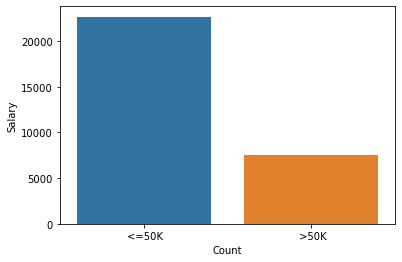

In [14]:
sns.countplot(x="Salary", data = sal_train)
plt.ylabel("Salary")
plt.xlabel("Count")
plt.show()

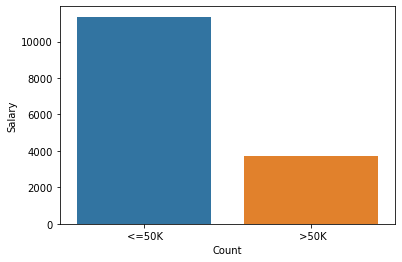

In [15]:
sns.countplot(x="Salary", data = sal_test)
plt.ylabel("Salary")
plt.xlabel("Count")
plt.show()

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

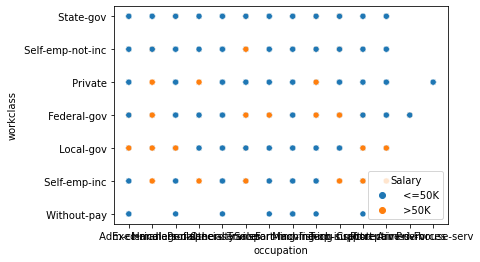

In [16]:
sns.scatterplot(sal_train["occupation"], sal_train["workclass"],hue = sal_train["Salary"])

<AxesSubplot:xlabel='education'>

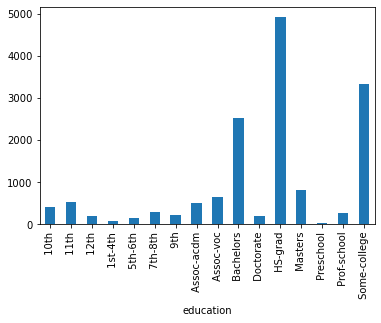

In [17]:
pd.crosstab(sal_train["Salary"],sal_train["education"]).mean().plot(kind="bar")

<AxesSubplot:xlabel='occupation'>

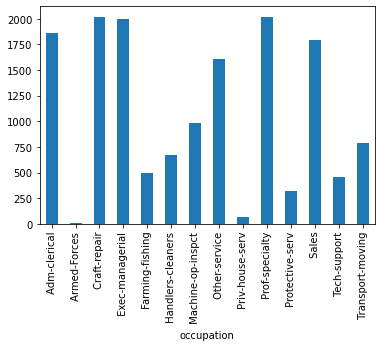

In [18]:
pd.crosstab(sal_train["Salary"],sal_train["occupation"]).mean().plot(kind="bar")

<AxesSubplot:xlabel='workclass'>

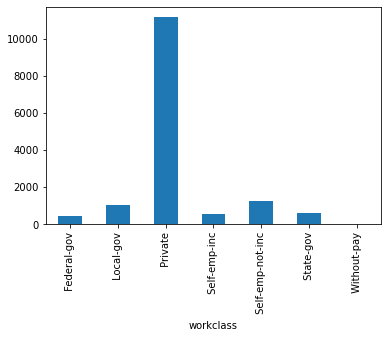

In [19]:
pd.crosstab(sal_train["Salary"],sal_train["workclass"]).mean().plot(kind="bar")

<AxesSubplot:xlabel='sex'>

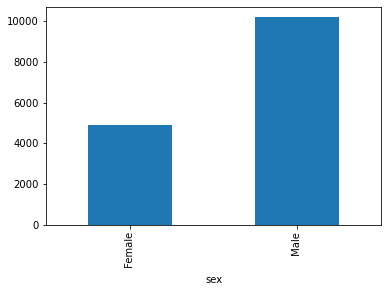

In [20]:
pd.crosstab(sal_train["Salary"],sal_train["sex"]).mean().plot(kind="bar")

<AxesSubplot:xlabel='relationship'>

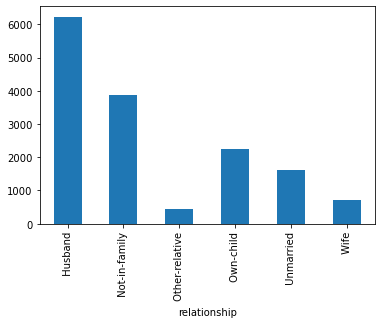

In [21]:
pd.crosstab(sal_train["Salary"],sal_train["relationship"]).mean().plot(kind="bar")

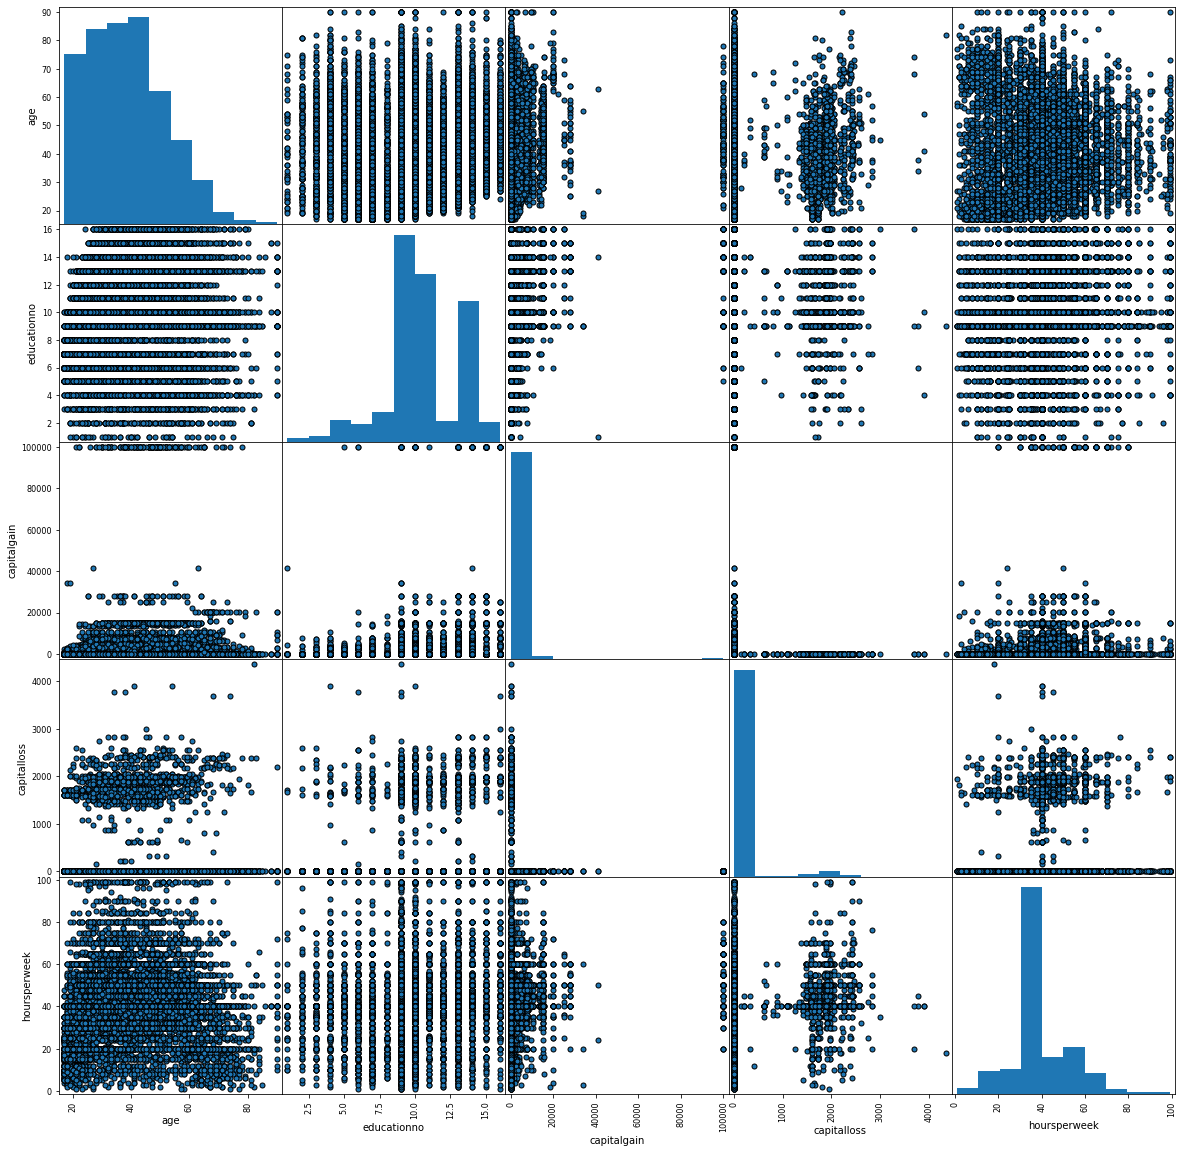

In [22]:
pd.plotting.scatter_matrix(sal_train, figsize=[20,20],diagonal="hist",alpha=1,s=100,marker='.',edgecolor="black")
plt.show()

In [23]:
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [24]:
label = LabelEncoder()
for i in columns:
    sal_train[i] = label.fit_transform(sal_train[i])
    sal_test[i] = label.fit_transform(sal_test[i])

In [25]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [26]:
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [27]:
colnames = sal_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
x_train = sal_train[colnames[0:13]]
x_test = sal_test[colnames[0:13]]
y_train = sal_train[colnames[13]]
y_test = sal_test[colnames[13]]

In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [30]:
x_train = norm_func(x_train)
x_test = norm_func(x_test)

In [31]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


In [32]:
model_svm = SVC(kernel = "linear", random_state = 40, gamma = 0.1, C = 1)
model_svm.fit(x_train, y_train)
pred = model_svm.predict(x_test)

In [33]:
np.mean(pred==y_test)

0.8096945551128818

In [34]:
model_poly = SVC(kernel = "poly", random_state=40, gamma = 0.1, C=1)
model_poly.fit(x_train, y_train)
pred_poly = model_poly.predict(x_test)

In [35]:
np.mean(pred_poly==y_test)

0.8205179282868525

In [36]:
model_rbf = SVC(kernel = "rbf", random_state = 40, gamma = 0.1, C = 1)
model_rbf.fit(x_train, y_train)
pred_rbf = model_rbf.predict(x_test)

In [37]:
np.mean(pred_rbf==y_test)

0.8280876494023904

In [38]:
model_sig = SVC(kernel = "sigmoid", random_state = 40, gamma = 0.1, C = 1)
model_sig.fit(x_train, y_train)
pred_sig = model_sig.predict(x_test)

In [39]:
np.mean(pred_sig==y_test)

0.7893758300132803

SVM With GridSearch

In [43]:
grid = SVC()
param_grid = [{"kernel" : ["rbf"],"random_state":[40],"gamma":[0.1],"C":[1.0]}]

In [44]:
GSV = GridSearchCV(grid, param_grid, cv = 10)
GSV.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [45]:
GSV.best_params_ , GSV.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8294490262517703)

In [46]:
grid = SVC(C = 15, gamma = 50)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy = ", acc)

Accuracy =  0.8064409030544488


In [49]:
confusion_matrix(y_test, y_pred)

array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [50]:
grid = SVC()
param_grid = [{"kernel" : ["linear"],"random_state":[40],"gamma":[0.1],"C":[1.0]}]

In [51]:
GSV = GridSearchCV(grid, param_grid, cv = 10)
GSV.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [52]:
GSV.best_params_ , GSV.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8118431562437083)

In [53]:
grid = SVC(C = 15, gamma = 50)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

In [54]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy = ", acc)

Accuracy =  0.8064409030544488


In [55]:
confusion_matrix(y_test, y_pred)

array([[10365,   995],
       [ 1920,  1780]], dtype=int64)